In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Churn Modeling.csv")
data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data_balance = data['Balance']
data_balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [8]:
data_drop = ['Surname'	, 'Geography', 'Gender']
data_correlation = data.drop(columns=data_drop)
data_correlation.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


<function matplotlib.pyplot.show(close=None, block=None)>

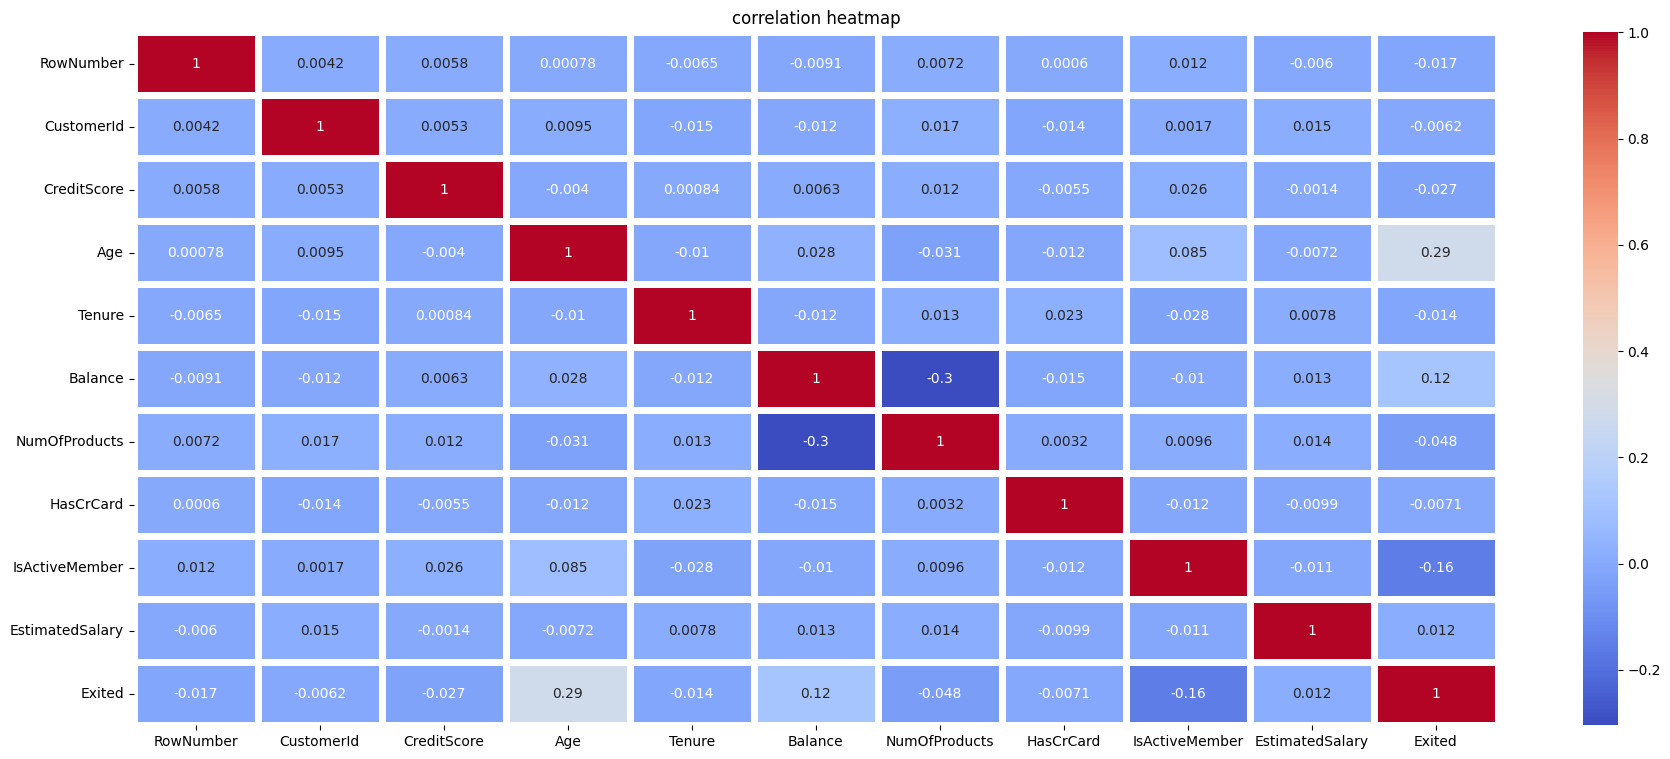

In [9]:

correlation = data_correlation.corr()
plt.figure(figsize=(22,9))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=5)
plt.title('correlation heatmap')
plt.show

<Figure size 2000x1000 with 0 Axes>

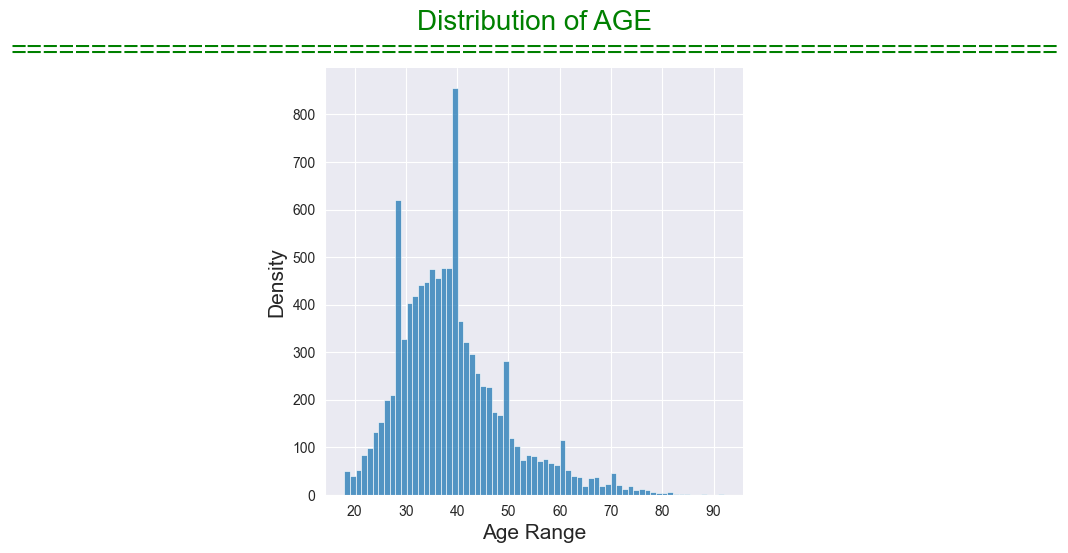

In [15]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.displot(data.Age)
plt.title("Distribution of AGE\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()

In [11]:
data['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [52]:
# berdasarkan jurnal berikut adalah penyebaran data dimana anak muda berkisar dari 25-44 tahun, middle age 
# berkisar 44-60 tahun, orang tua berkisar 60-75 tahun, dan senile age berkisar 75 tahun keatas
# maka dari itu kita akan membagi berdasarkan data diatas

Age_25_35 = data.Age[(data.Age>=25) & (data.Age<=35)]
Age_36_45 = data.Age[(data.Age>=36) & (data.Age<=45)]
Age_46_55 = data.Age[(data.Age>=46) & (data.Age<=55)]
Age_above_56 = data.Age[(data.Age>=56)]

print("umur 25-35 : ", len(Age_25_35))
print("umur 36-45 : ", len(Age_36_45))
print("umur 46-55 : ", len(Age_46_55))
print("umur diatas 56 : ", len(Age_above_56))

# Age_25_35.head()

 


umur 25-35 :  3696
umur 36-45 :  3736
umur 46-55 :  1311
umur diatas 56 :  800


In [29]:
# age_56_above = data.Age[(data.Age >= 56)]
# age_56_below = data.Age[(data.Age <= 55) & (data.Age >=25)]

# # len(age_56_above)
# len(age_56_below)

8743

<Figure size 2000x1000 with 0 Axes>

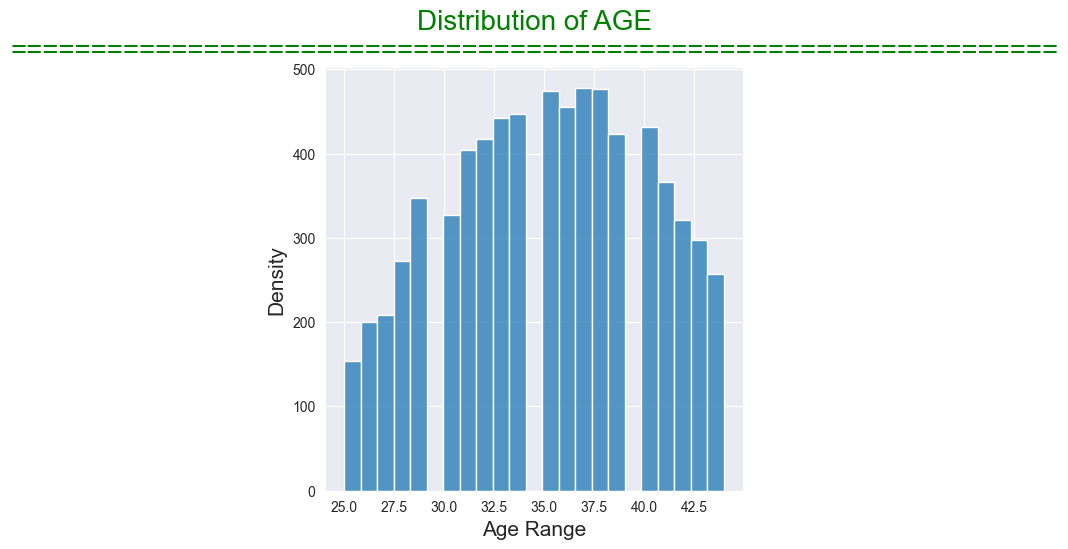

In [26]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.displot(data.Age)
plt.title("Distribution of AGE\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()

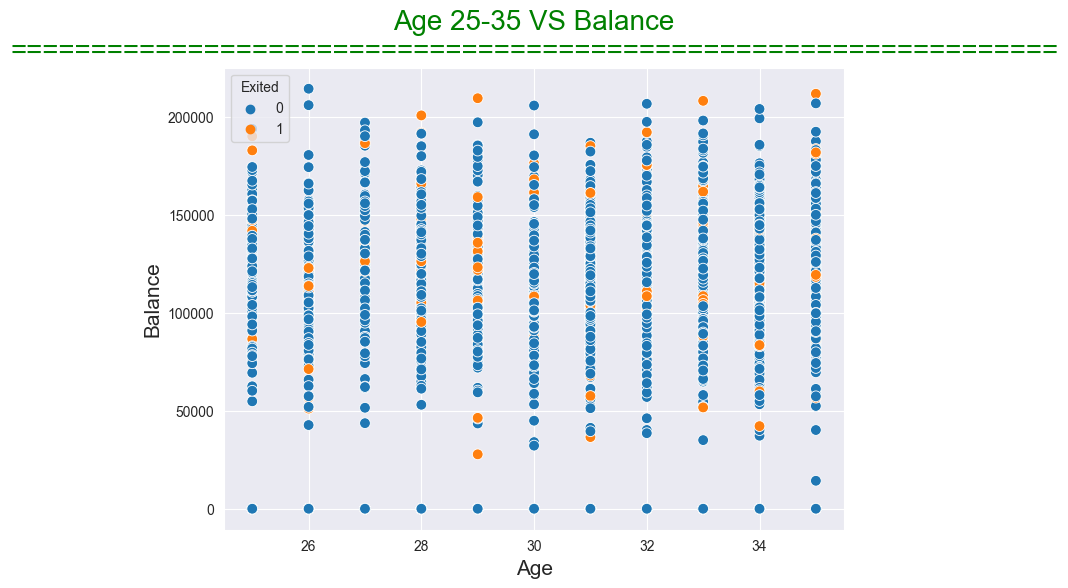

In [47]:
# Age 25-35  VS Exited

plt.figure(figsize=(8,6))
sns.set_style('darkgrid')

sns.scatterplot(data=data, x=Age_25_35, y= "Balance", hue="Exited", s=60)
plt.title("Age 25-35 VS Balance\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Balance", fontsize=15)
plt.show()


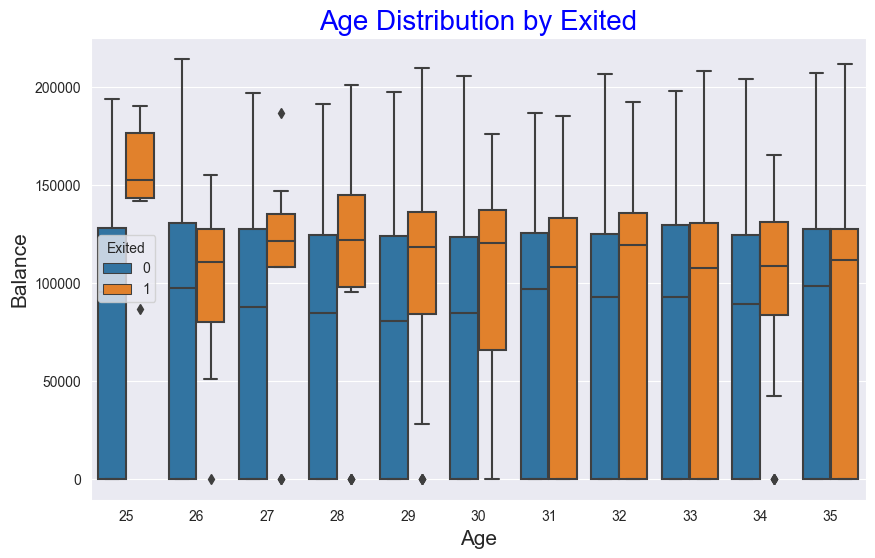

In [50]:
# Age VS Exited

# plt.figure(figsize=(10,6))
# sns.set_style('darkgrid')

# sns.scatterplot(data=data, x="Age", y= "Exited", hue="Gender", s=60)
# plt.title("Age VS Exited\n=================================================================", fontsize=20, color="green")
# plt.xlabel("Age", fontsize=15)
# plt.ylabel("Exited", fontsize=15)
# plt.show()

# Membuat boxplot berdasarkan Age 25-35 dan Exited
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x=Age_25_35, y="Balance", hue="Exited")
plt.title("Age Distribution by Exited", fontsize=20, color="blue")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Balance", fontsize=15)

plt.show()